# Hypothesis
## Null hypothesis (H₀): 
Increased academic workload during final weeks leads to a decrease in my physical activity levels.


## Alternative Hypothesis (Hᴬ):
Increased academic workload during final weeks does not lead to a decrease in my physical activity levels.

## Significance Level: 
As most of hypothesis tests assume significance level as 0.05, I am setting it as 0.05.

# Parsing the XML file and Creating Dataframes

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import bs4 
import numpy as np
import seaborn as sns
import xml.etree.ElementTree as ET
from datetime import datetime
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [85]:
xml_file = r"C:\Users\ATACA\Desktop\health_data.xml"

In [86]:
# defining a function to print xml file
def print_xml_content(element, indent=0):
    print('  ' * indent + f'Tag: {element.tag}, Attribute: {element.attrib}, Text: {element.text}')
    for child in element:
        print_xml_content(child, indent + 1)

# Opening and creating a tree for xml file
tree = ET.parse(xml_file)
root = tree.getroot()

limit =  10000 # this much of data will be sufficient
count = 0

target_type_1 = 'HKQuantityTypeIdentifierStepCount'
target_type_2 = 'HKQuantityTypeIdentifierDistanceWalkingRunning'
target_type_3 = 'HKQuantityTypeIdentifierBasalEnergyBurned'
target_type_4 = 'HKQuantityTypeIdentifierActiveEnergyBurned'

target_elements = ['type', 'value', 'startDate'] # I will use only value and start date

records_list = []


def data_frame_generator(target_type):
    global count
    for record in root.findall(f".//Record[@type='{target_type}']"):
        
        record_dict = {'Tag': record.tag}
        for element_name in target_elements:
            element_value = record.attrib.get(element_name, '')
            record_dict[element_name] = element_value
        
        records_list.append(record_dict)
        #count += 1
        #if count >= limit:
            #break
    return pd.DataFrame(records_list)


# Create dataframes for each data by using the function above
# No need for tag and type since I am creating the dataframes seperateley
# Drop 'Tag' and 'type' from dataframes

df_step_count = data_frame_generator(target_type_1)
df_step_count = df_step_count.drop('Tag', axis = 1)
df_step_count= df_step_count.drop('type', axis =1)
count = 0
del records_list
records_list = []

df_distance = data_frame_generator(target_type_2)
df_distance = df_distance.drop('Tag', axis=1)
df_distance = df_distance.drop('type', axis = 1)
count = 0
del records_list
records_list = []

df_basal_burn = data_frame_generator(target_type_3)
df_basal_burn = df_basal_burn.drop('Tag', axis=1)
df_basal_burn = df_basal_burn.drop('type', axis = 1)
count = 0
del records_list
records_list = []

df_active_burn = data_frame_generator(target_type_4)
df_active_burn = df_active_burn.drop('Tag', axis=1)
df_active_burn = df_active_burn.drop('type', axis = 1)
count = 0
del records_list
records_list = []


# I want to create 'Year', 'Month', 'Day' columns to operate easliy
# No need for hour, minute and second, I ignore them

df_step_count['startDate'] = pd.to_datetime(df_step_count['startDate'], format="%Y-%m-%d %H:%M")
df_step_count['Year'] = df_step_count['startDate'].dt.year
df_step_count['Month'] = df_step_count['startDate'].dt.month
df_step_count['Day'] = df_step_count['startDate'].dt.day
df_step_count['startDate'] = df_step_count['startDate'].apply(lambda x: x.strftime("%Y-%m-%d"))

df_distance['startDate'] = pd.to_datetime(df_distance['startDate'], format="%Y-%m-%d %H:%M")
df_distance['Year'] = df_distance['startDate'].dt.year
df_distance['Month'] = df_distance['startDate'].dt.month
df_distance['Day'] = df_distance['startDate'].dt.day
df_distance['startDate'] = df_distance['startDate'].apply(lambda x: x.strftime("%Y-%m-%d"))

df_basal_burn['startDate'] = pd.to_datetime(df_basal_burn['startDate'], format="%Y-%m-%d %H:%M")
df_basal_burn['Year'] = df_basal_burn['startDate'].dt.year
df_basal_burn['Month'] = df_basal_burn['startDate'].dt.month
df_basal_burn['Day'] = df_basal_burn['startDate'].dt.day
df_basal_burn['startDate'] = df_basal_burn['startDate'].apply(lambda x: x.strftime("%Y-%m-%d"))

df_active_burn['startDate'] = pd.to_datetime(df_active_burn['startDate'], format="%Y-%m-%d %H:%M")
df_active_burn['Year'] = df_active_burn['startDate'].dt.year
df_active_burn['Month'] = df_active_burn['startDate'].dt.month
df_active_burn['Day'] = df_active_burn['startDate'].dt.day
df_active_burn['startDate'] = df_active_burn['startDate'].apply(lambda x: x.strftime("%Y-%m-%d"))


#print(df_step_count --> df for step count
#print(df_distance --> df for distance
#print(df_basal_burn --> df for basal burn
#print(df_active_burn --> df for active burn

# merging dataframes for easier operation
df_step_distance = pd.merge(df_step_count, df_distance, on=['Year', 'Month', 'Day', 'startDate'], how='inner')
df_basal_active = pd.merge(df_basal_burn, df_active_burn, on=['Year', 'Month', 'Day', 'startDate'], how='inner')

df_step_distance.rename(columns={'value_x': 'Step Count'}, inplace=True)
df_step_distance.rename(columns={'value_y': 'Distance'}, inplace=True)
df_step_distance.rename(columns={'startDate': 'Date'}, inplace=True)
df_step_distance['Distance'] = df_step_distance['Distance'].astype(float)
df_step_distance['Distance'] = df_step_distance['Distance'] * 1000


print(df_step_distance)

df_basal_active.rename(columns={'value_x': 'Basal Burn'}, inplace=True)
df_basal_active.rename(columns={'value_y': 'Active Burn'}, inplace=True)
df_basal_active.rename(columns={'startDate': 'Date'}, inplace=True)
df_basal_active['Basal Burn'] = df_basal_active['Basal Burn'].astype(float)
df_basal_active['Active Burn'] = df_basal_active['Active Burn'].astype(float)
df_basal_active['Basal Burn'] = df_basal_active['Basal Burn'] * 1000
df_basal_active['Active Burn'] = df_basal_active['Active Burn'] * 1000


print(df_basal_active)




       Step Count        Date  Year  Month  Day  Distance
0               9  2022-03-18  2022      3   18      6.75
1               9  2022-03-18  2022      3   18     15.48
2               9  2022-03-18  2022      3   18    140.09
3              23  2022-03-18  2022      3   18      6.75
4              23  2022-03-18  2022      3   18     15.48
...           ...         ...   ...    ...  ...       ...
339251         12  2023-12-26  2023     12   26      6.32
339252         12  2023-12-26  2023     12   26    372.01
339253         12  2023-12-26  2023     12   26     10.93
339254         12  2023-12-26  2023     12   26     14.17
339255         12  2023-12-26  2023     12   26      6.72

[339256 rows x 6 columns]
        Basal Burn        Date  Year  Month  Day  Active Burn
0          15001.0  2022-09-28  2022      9   28        110.0
1          15001.0  2022-09-28  2022      9   28        771.0
2          15001.0  2022-09-28  2022      9   28          2.0
3          15001.0  2022-09-2

## In Sabancı University, in 2022 - 2023; Fall term final exams were on  7 - 20 January 2023, Spring term final exams were on 1 - 11 June 2023.

## Based on these records, I will set an interval on my data which will cover both exam periods.

## Interval: 01-10-2022 to 01-10-2023


In [87]:
start_date = '2022-10-01'
end_date = '2023-10-01'

mask = (df_step_distance['Date'] >= start_date) & (df_step_distance['Date'] <= end_date)
df_step_distance = df_step_distance[mask]

mask = (df_basal_active['Date'] >= start_date) & (df_basal_active['Date'] <= end_date)
df_basal_active = df_basal_active[mask]

print(df_step_distance)
print(df_basal_active)

       Step Count        Date  Year  Month  Day  Distance
108417         19  2022-10-01  2022     10    1     13.41
108418         19  2022-10-01  2022     10    1     14.28
108419         19  2022-10-01  2022     10    1     49.88
108420         19  2022-10-01  2022     10    1     68.98
108421         19  2022-10-01  2022     10    1     86.90
...           ...         ...   ...    ...  ...       ...
297632         11  2023-10-01  2023     10    1    178.59
297633         11  2023-10-01  2023     10    1     14.44
297634         11  2023-10-01  2023     10    1      9.49
297635         11  2023-10-01  2023     10    1      3.85
297636         11  2023-10-01  2023     10    1      4.51

[189220 rows x 6 columns]
        Basal Burn        Date  Year  Month  Day  Active Burn
8246       14406.0  2022-10-01  2022     10    1        376.0
8247       14406.0  2022-10-01  2022     10    1        694.0
8248       14406.0  2022-10-01  2022     10    1       1081.0
8249       14406.0  2022-10-0

## Checking whether there are any missing values or not

In [88]:

print("For Step Count - Distance dataframe:")
print()
print(df_step_distance.isnull().sum())
print()
print()
print("For Basal Burn - Active Burn dataframe:")
print()
print(df_basal_active.isnull().sum())

For Step Count - Distance dataframe:

Step Count    0
Date          0
Year          0
Month         0
Day           0
Distance      0
dtype: int64


For Basal Burn - Active Burn dataframe:

Basal Burn     0
Date           0
Year           0
Month          0
Day            0
Active Burn    0
dtype: int64


## I have constructed the dataframes that I will use
## Here are the statistics:

In [89]:
# setting types of columns'
df_step_distance['Step Count'] = df_step_distance['Step Count'].astype(int)
df_step_distance['Distance'] = df_step_distance['Distance'].astype(float)


df_basal_active['Basal Burn'] = df_basal_active['Basal Burn'].astype(float)
df_basal_active['Active Burn'] = df_basal_active['Active Burn'].astype(float)


# printing features of each dataframe
print("Step Count - Distance dataframe:")
print()
df_step_distance.info()
print()
print(df_step_distance.describe())
print()
print(df_step_distance.shape)

print()
print()
print()

print("Basal Burn - Active Burn dataframe:")
print()
df_basal_active.info()
print()
print(df_basal_active.describe())
print()
print(df_basal_active.shape)

Step Count - Distance dataframe:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189220 entries, 108417 to 297636
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Step Count  189220 non-null  int32  
 1   Date        189220 non-null  object 
 2   Year        189220 non-null  int64  
 3   Month       189220 non-null  int64  
 4   Day         189220 non-null  int64  
 5   Distance    189220 non-null  float64
dtypes: float64(1), int32(1), int64(3), object(1)
memory usage: 9.4+ MB

          Step Count           Year          Month            Day  \
count  189220.000000  189220.000000  189220.000000  189220.000000   
mean      181.345207    2022.707785       6.883041      16.002690   
std       249.500810       0.454782       3.452466       9.113775   
min         1.000000    2022.000000       1.000000       1.000000   
25%        18.000000    2022.000000       4.000000       8.000000   
50%        57.000000    2023

# Visualizing Data

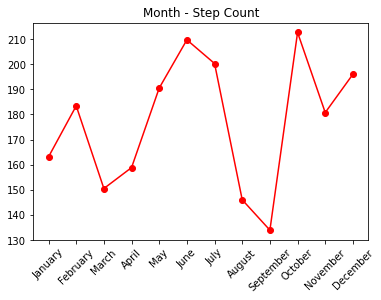

In [95]:

x_ticks = [1, 2, 3, 4, 5, 6 ,7 ,8, 9, 10, 11, 12]
x_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


average_step = df_step_distance.groupby('Month')['Step Count'].mean()
plt.plot(average_step.index, average_step.values, color='red', marker = 'o')
plt.xticks(x_ticks, x_labels)
plt.xticks(rotation=45)
plt.title('Month - Step Count')
plt.show()


# # Since there is no correlation between final exam period and decline in the step count data, it can be said that "Null Hypothesis" is falsified. Instead "Alternative hypothesis" is more accurate 

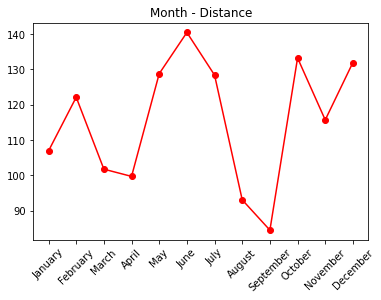

In [96]:
average_distance = df_step_distance.groupby('Month')['Distance'].mean()
plt.plot(average_distance.index, average_distance.values, color='red', marker = 'o') # in m
plt.xticks(x_ticks, x_labels)
plt.xticks(rotation=45)
plt.title('Month - Distance')
plt.show()

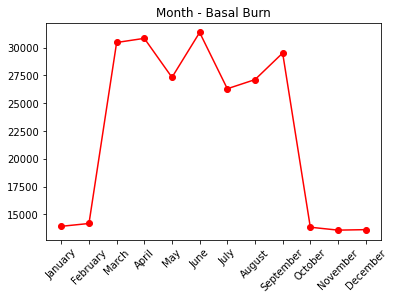

In [97]:
average_basal_burn = df_basal_active.groupby('Month')['Basal Burn'].mean()
plt.plot(average_basal_burn.index, average_basal_burn.values, color='red', marker = 'o') # in cal
plt.xticks(x_ticks, x_labels)
plt.xticks(rotation=45)
plt.title('Month - Basal Burn')
plt.show()

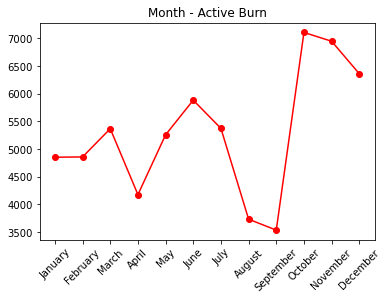

In [98]:
average_active_burn = df_basal_active.groupby('Month')['Active Burn'].mean()
plt.plot(average_active_burn.index, average_active_burn.values, color='red', marker = 'o') # in cal
plt.xticks(x_ticks, x_labels)
plt.xticks(rotation=45)
plt.title('Month - Active Burn')
plt.show()

# Machine Learning

In [91]:
df_shuffled_step_distance = shuffle(df_step_distance, random_state = 42)
X = df_shuffled_step_distance.drop(['Step Count'], axis = 1)
X = df_shuffled_step_distance.drop(['Date'], axis = 1)
Y = df_shuffled_step_distance.drop(['Date'], axis=1)
Y = df_shuffled_step_distance['Step Count']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print(X_train)
print("--------------------------------------------------")
print(X_test)
print("--------------------------------------------------")
print(Y_train)
print("--------------------------------------------------")
print(Y_test)
print("--------------------------------------------------")







df_shuffled_basal_active = shuffle(df_basal_active, random_state = 42)
print(df_shuffled_basal_active)
A = df_shuffled_basal_active.drop(['Active Burn'], axis = 1)
B = df_shuffled_basal_active['Active Burn']

A_train, A_test, B_train, B_test = train_test_split(A, B, test_size = 0.2, random_state = 42)


print(A_train)
print("--------------------------------------------------")
print(A_test)
print("--------------------------------------------------")
print(B_train)
print("--------------------------------------------------")
print(B_test)
print("--------------------------------------------------")


        Step Count  Year  Month  Day  Distance
119332          63  2022     10    9      6.80
125451         232  2022     10   20    140.33
243107         818  2023      7    5    299.50
241469          69  2023      7    4      1.56
274097         101  2023      8   17     34.23
...            ...   ...    ...  ...       ...
163971          24  2023      1    1     17.58
190151          41  2023      2   15      7.04
237589         393  2023      6   24    424.37
213773         319  2023      4   23    214.46
165344         472  2023      1    5    246.65

[151376 rows x 5 columns]
--------------------------------------------------
        Step Count  Year  Month  Day  Distance
251620          22  2023      7   18     11.79
223532          22  2023      5   21     34.22
273900         167  2023      8   17     66.85
147977         174  2022     12    2     77.46
141364         163  2022     11   21      0.84
...            ...   ...    ...  ...       ...
223134          15  2023     

            Step Count      Year     Month       Day  Distance
Step Count    1.000000 -0.047911  0.023878 -0.032723  0.162531
Year         -0.047911  1.000000 -0.743573  0.082267 -0.042044
Month         0.023878 -0.743573  1.000000  0.012703  0.016007
Day          -0.032723  0.082267  0.012703  1.000000 -0.034882
Distance      0.162531 -0.042044  0.016007 -0.034882  1.000000


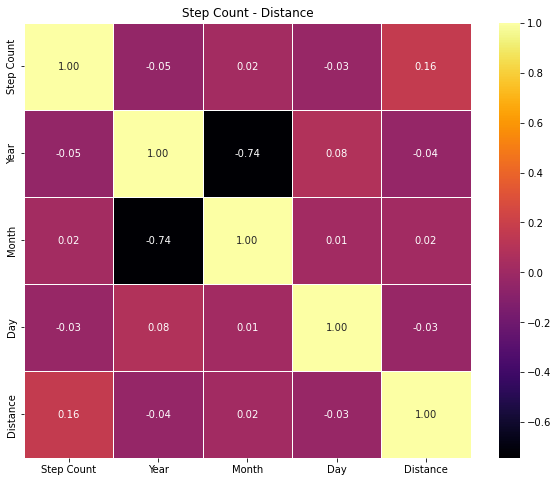

        Step Count
182744         466
205786         229
201676          30
291893          15
268079         122
...            ...
228296           4
212111          78
240349         250
255284          30
230375         502

[189220 rows x 1 columns]


In [103]:
correlation = df_shuffled_step_distance.corr()
print(correlation)
plt.figure(figsize=(10,8))
sns.heatmap(correlation, cmap='inferno', annot = True, linewidths=0.5, fmt=".2f")
plt.title('Step Count - Distance')
plt.show()


strong_correlation = correlation['Step Count'].abs()
features = strong_correlation[strong_correlation > 0.6].index.tolist()

strong_features = df_shuffled_step_distance[features]
print(strong_features)




 

             Basal Burn      Year     Month       Day  Active Burn
Basal Burn     1.000000  0.256980 -0.060575  0.020268    -0.038741
Year           0.256980  1.000000 -0.810023  0.017700    -0.116842
Month         -0.060575 -0.810023  1.000000  0.034197     0.079121
Day            0.020268  0.017700  0.034197  1.000000    -0.035427
Active Burn   -0.038741 -0.116842  0.079121 -0.035427     1.000000


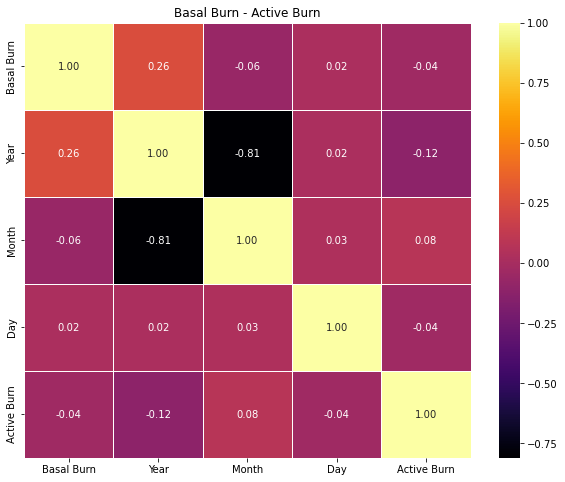

        Active Burn
196521      22993.0
149278        463.0
156549      15561.0
471879       1564.0
204734        824.0
...             ...
267424         95.0
374084        371.0
140178       9002.0
155113       3897.0
130204      27691.0

[516914 rows x 1 columns]


In [104]:
correlation2 = df_shuffled_basal_active.corr()
print(correlation2)
plt.figure(figsize = (10,8))
sns.heatmap(correlation2, cmap='inferno', annot= True, linewidths = 0.5, fmt=".2f")
plt.title('Basal Burn - Active Burn')
plt.show()

strong_correlation2 = correlation2['Active Burn'].abs()
features2 = strong_correlation2[strong_correlation2 > 0.6].index.tolist()
strong_features2 = df_shuffled_basal_active[features2]
print(strong_features2)



        Step Count  Distance  Active Burn  Basal Burn
182744         466      1.76       8227.0     22069.0
205786         229     49.48        960.0     13715.0
201676          30      8.71        475.0     22785.0
291893          15      8.38        596.0      5320.0
268079         122    409.86        276.0     14250.0
...            ...       ...          ...         ...
228296           4     35.88      24469.0     10215.0
212111          78     38.60        258.0     18749.0
240349         250      7.38       5155.0     12949.0
255284          30     18.54       7304.0     14786.0
230375         502      8.76        792.0     60514.0

[189220 rows x 4 columns]
             Step Count  Distance  Active Burn  Basal Burn
Step Count     1.000000  0.162531     0.006117    0.000497
Distance       0.162531  1.000000     0.010738   -0.003093
Active Burn    0.006117  0.010738     1.000000    0.005369
Basal Burn     0.000497 -0.003093     0.005369    1.000000


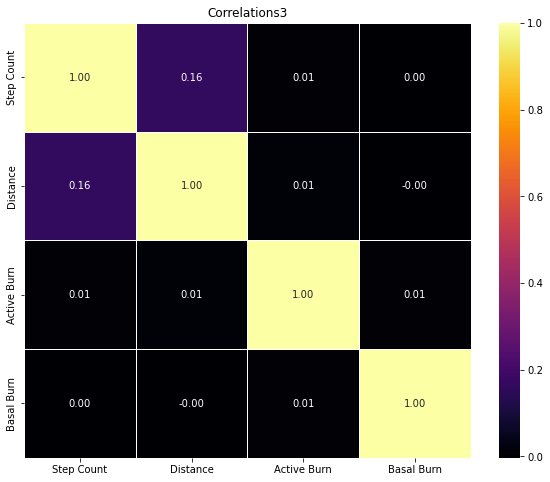

In [101]:
df_all = pd.DataFrame()
df_all['Step Count'] = df_step_distance['Step Count']
df_all['Distance'] = df_step_distance['Distance']
df_all['Active Burn'] = df_basal_active['Active Burn']
df_all['Basal Burn'] = df_basal_active['Basal Burn']
df_all = shuffle(df_all, random_state = 42)
print(df_all)

correlation3 = df_all.corr()
print(correlation3)
plt.figure(figsize=(10,8))
sns.heatmap(correlation3, cmap='inferno', annot = True, linewidths=0.5, fmt=".2f")
plt.title('Correlations3')
plt.show()

In [105]:
dt_classifier = DecisionTreeClassifier()
param_grid = {'max_depth': [5,10,40,50,60], 'min_samples_split':[5,10,15,20,25]}
dt_classifier = DecisionTreeClassifier(class_weight = class_weights)

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X,Y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters: ", best_params)
print("Accuracy rate: ", best_score)

model = DecisionTreeClassifier(min_samples_split=5, max_depth=60)
model.fit(X_train, Y_train)

Best Hyperparameters:  {'max_depth': 60, 'min_samples_split': 5}
Accuracy rate:  0.8504175034351549


DecisionTreeClassifier(max_depth=60, min_samples_split=5)

# The model that I trained has about 85% accuracy